# 第12回演習「ラベル伝播法」その2

この演習では、ラベル無しデータの割合に対するラベル伝播法の結果の違いを見ていきます。<br />
グレイの背景のプログラムは上から順に、1つずつ実行していきましょう。<br />
<hr />

## 15) まずここを実行しましょう

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 2 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 2 2 1 2 1 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


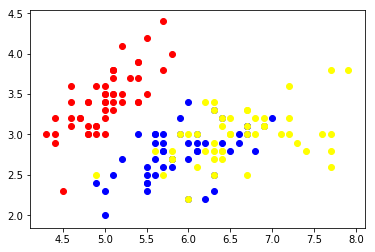

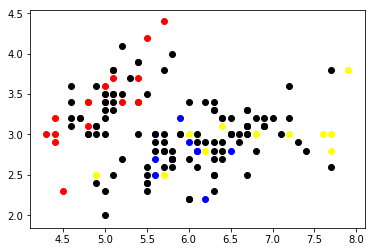

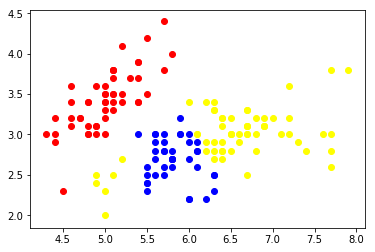

In [3]:
import seaborn as sns
アヤメのデータ = sns.load_dataset("iris")
説明変数X=アヤメのデータ.values[:,[0,1,2,3]]
説明変数X=説明変数X[:,:2] # sepal_lengthとsepal_widthを取り出す

y=アヤメのデータ.values[:,4]
y = [s.replace('setosa', '0') for s in y] # setosa を 0 に
y = [s.replace('versicolor', '1') for s in y] # versicolor を 1 に
y = [s.replace('virginica', '2') for s in y] # virginica を 2 に
y = [int(n) for n in y] # 文字を数値に

import numpy as np
目的変数y = np.array(y) # NumPyの配列に

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(説明変数X[目的変数y==0,0],説明変数X[目的変数y==0,1],c = 'red')
plt.scatter(説明変数X[目的変数y==1,0],説明変数X[目的変数y==1,1],c = 'blue')
plt.scatter(説明変数X[目的変数y==2,0],説明変数X[目的変数y==2,1],c = 'yellow')
plt.scatter(説明変数X[目的変数y==-1,0],説明変数X[目的変数y==-1,1],c = 'black')

範囲の下限=0
範囲の上限=目的変数y.size
ランダムにする割合=0.7
ランダムにする個数=int((目的変数y.size)*ランダムにする割合)
ラベル無しのインデックス=np.random.choice(range(範囲の下限,範囲の上限),
                              ランダムにする個数,replace=False)
ラベル配列=np.copy(目的変数y)
ラベル配列[ラベル無しのインデックス] = -1

plt.figure()
plt.scatter(説明変数X[ラベル配列==0,0],説明変数X[ラベル配列==0,1],c = 'red')
plt.scatter(説明変数X[ラベル配列==1,0],説明変数X[ラベル配列==1,1],c = 'blue')
plt.scatter(説明変数X[ラベル配列==2,0],説明変数X[ラベル配列==2,1],c = 'yellow')
plt.scatter(説明変数X[ラベル配列==-1,0],説明変数X[ラベル配列==-1,1],c = 'black')

from sklearn.semi_supervised import LabelPropagation
ラベル伝播=LabelPropagation(max_iter=10000) # 最大繰り返し数
ラベル伝播.fit(説明変数X,ラベル配列) # 学習
予測されたy=ラベル伝播.predict(説明変数X)
print(予測されたy)

plt.figure()
plt.scatter(説明変数X[予測されたy==0,0],説明変数X[予測されたy==0,1],c = 'red')
plt.scatter(説明変数X[予測されたy==1,0],説明変数X[予測されたy==1,1],c = 'blue')
plt.scatter(説明変数X[予測されたy==2,0],説明変数X[予測されたy==2,1],c = 'yellow')
plt.scatter(説明変数X[予測されたy==-1,0],説明変数X[予測されたy==-1,1],c = 'black')
plt.show()

## 16) 正解率を表示

In [2]:
# ラベル無し部分だけ見て比較し、スコアを出す
print(ラベル伝播.score(説明変数X[ラベル無しのインデックス],目的変数y[ラベル無しのインデックス]))

0.7523809523809524


## 17) 説明変数を4次元に戻す

In [4]:
# プログラム#15では 説明変数X=説明変数X[:,:2] として2列だけ取り出していたが、
# 改めて元のデータから4列、読み直す
説明変数X=アヤメのデータ.values[:,[0,1,2,3]]
print(説明変数X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## 18) 4次元のデータで、ふたたびラベル伝播法を適用

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


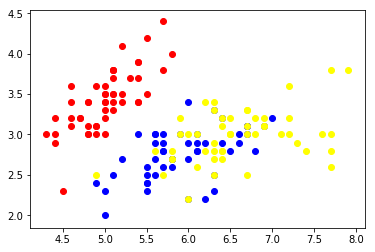

0.9904761904761905


In [5]:
# ランダムに「ラベル無し」にする処理は、やり直す
範囲の下限=0
範囲の上限=目的変数y.size
ランダムにする割合=0.7
ランダムにする個数=int((目的変数y.size)*ランダムにする割合)
ラベル無しのインデックス=np.random.choice(range(範囲の下限,範囲の上限),
                              ランダムにする個数,replace=False)
ラベル配列=np.copy(目的変数y)
ラベル配列[ラベル無しのインデックス] = -1

ラベル伝播=LabelPropagation(max_iter=10000) # 最大繰り返し数
ラベル伝播.fit(説明変数X,ラベル配列) # 4次元の説明変数を使って学習
予測されたy=ラベル伝播.predict(説明変数X)
print(予測されたy)

plt.figure()
plt.scatter(説明変数X[予測されたy==0,0],説明変数X[予測されたy==0,1],c = 'red')
plt.scatter(説明変数X[予測されたy==1,0],説明変数X[予測されたy==1,1],c = 'blue')
plt.scatter(説明変数X[予測されたy==2,0],説明変数X[予測されたy==2,1],c = 'yellow')
plt.scatter(説明変数X[予測されたy==-1,0],説明変数X[予測されたy==-1,1],c = 'black')
plt.show()

print(ラベル伝播.score(説明変数X[ラベル無しのインデックス],目的変数y[ラベル無しのインデックス]))

## 19) 「ラベル無し」の割合を変化させてみる

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


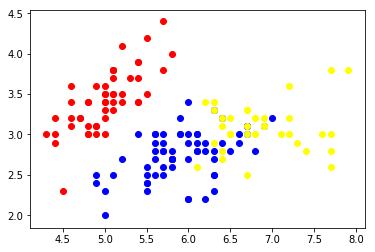

0.9014084507042254


In [8]:
# 変数「ランダムにする割合」の値が変わっていることに注意
範囲の下限=0
範囲の上限=目的変数y.size
ランダムにする割合=0.95 ######### ← ここが変わっています!
ランダムにする個数=int((目的変数y.size)*ランダムにする割合)
ラベル無しのインデックス=np.random.choice(range(範囲の下限,範囲の上限),
                              ランダムにする個数,replace=False)
ラベル配列=np.copy(目的変数y)
ラベル配列[ラベル無しのインデックス] = -1

ラベル伝播=LabelPropagation(max_iter=10000) # 最大繰り返し数
ラベル伝播.fit(説明変数X,ラベル配列) # 4次元の説明変数を使って学習
予測されたy=ラベル伝播.predict(説明変数X)
print(予測されたy)

plt.figure()
plt.scatter(説明変数X[予測されたy==0,0],説明変数X[予測されたy==0,1],c = 'red')
plt.scatter(説明変数X[予測されたy==1,0],説明変数X[予測されたy==1,1],c = 'blue')
plt.scatter(説明変数X[予測されたy==2,0],説明変数X[予測されたy==2,1],c = 'yellow')
plt.scatter(説明変数X[予測されたy==-1,0],説明変数X[予測されたy==-1,1],c = 'black')
plt.show()

print(ラベル伝播.score(説明変数X[ラベル無しのインデックス],目的変数y[ラベル無しのインデックス]))

## 小出しの任意課題4) 
<span style="background-color:#FFFF99">
「ランダムにする割合」の割合を0.9 以外の好きな値に変え、何度も実行してみましょう。<br />どの程度割合を上げると、満足のいくスコアを得られにくくなるでしょうか?
</span><hr />

## 20) 「ラベル付き」の割合を次々に変化させる練習

In [9]:
割合の下限 = 0.05
割合の上限 = 0.45
刻み = 0.05
ラベル付き割合の配列 = np.arange(割合の下限,割合の上限,刻み)
print(ラベル付き割合の配列)

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]


## 21) 「ラベル付き」の割合を次々に変化させながら、ラベル伝播法の結果を見る
注) 全て出力されるまで、十数秒かかります

In [17]:
def ラベル無しのインデックスを作る(ラベル付きにしたい割合):
    範囲の下限=0
    範囲の上限=目的変数y.size
    ランダムにする割合=1-ラベル付きにしたい割合 
    ランダムにする個数=int((目的変数y.size)*ランダムにする割合)
    ラベル無しのインデックス=np.random.choice(range(範囲の下限,範囲の上限),
                                  ランダムにする個数,replace=False)
    return ラベル無しのインデックス

全体サイズ=目的変数y.size
試行回数=100
正解率 = []
for ラベル付き割合 in ラベル付き割合の配列:
    正解率合計=0
    for i in range(試行回数):
        ラベル無しのインデックス=ラベル無しのインデックスを作る(ラベル付き割合)
        ラベル配列=np.copy(目的変数y)
        ラベル配列[ラベル無しのインデックス]= -1
        ラベル伝播.fit(説明変数X,ラベル配列)
        正解率合計 += ラベル伝播.score(説明変数X[ラベル無しのインデックス],
                             目的変数y[ラベル無しのインデックス])    
    print("ラベル付の割合:",'{:.2f}'.format(ラベル付き割合),end="")
    print(", 平均正解率:",'{:.6f}'.format(正解率合計/試行回数))
    正解率.append(正解率合計/試行回数)

ラベル付の割合: 0.05, 平均正解率: 0.840352
ラベル付の割合: 0.10, 平均正解率: 0.904889
ラベル付の割合: 0.15, 平均正解率: 0.942047
ラベル付の割合: 0.20, 平均正解率: 0.952250
ラベル付の割合: 0.25, 平均正解率: 0.949821
ラベル付の割合: 0.30, 平均正解率: 0.958571
ラベル付の割合: 0.35, 平均正解率: 0.958454
ラベル付の割合: 0.40, 平均正解率: 0.960667


## 小出しの任意課題5) 
<span style="background-color:#FFFF99">
「ラベル付きの割合が変わることによる、平均正解率の変化」を matplotlib で図にしましょう。<br />
折れ線グラフでも棒グラフでもその他でも、構いません。</span><hr />

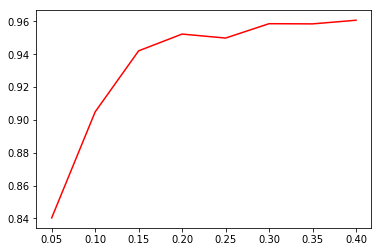

In [19]:
plt.plot(ラベル付き割合の配列,正解率,c = 'red')
plt.show()

## 小出しの任意課題6) 
<span style="background-color:#FFFF99">
半教師あり学習にも様々な手法があります。<br />
ラベル伝播法 (Label Propagation) とよく似た手法としてラベル拡散法 (Label Spreading)という<br />
ものがあります。両者の違いは
    <ul>
        <li>ラベル伝播法では、元のラベルは書き変わらない</li>
        <li>ラベル拡散法では、元のラベルも書き変わりうる</li>
    </ul>
です。ここで、疑い深いジャ子さんのために<br />
    「ラベル伝播法で、元のラベルが本当に書き変わっていないか」<br />
    を確かめるプログラムを書いてみましょう。
    </span><hr />

In [32]:
# print(目的変数y.shape)
all_index = np.arange(150)
non_existing_index = np.setdiff1d(all_index, ラベル無しのインデックス)
# print(ラベル無しのインデックス,non_existing_index)
display(目的変数y[non_existing_index])
display(ラベル配列[non_existing_index])
print(目的変数y[non_existing_index] == ラベル配列[non_existing_index])
# numpy配列が完全に一致するか確認
print(np.array_equal(目的変数y[non_existing_index],ラベル配列[non_existing_index]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
True


第12回第4章の演習はここまでです。お疲れさまでした。